In [1]:
from dependencies.NN import *
from dependencies.LTL import *
from dependencies.Utility_funcs import *
from dependencies.maps import grid_world
from dependencies.RL_LTL import RL_LTL

from dependencies.csrl.mdp import GridMDP
from dependencies.csrl.oa import OmegaAutomaton
from dependencies.csrl import ControlSynthesis
import numpy as np

from matplotlib import pyplot as plt

2024-02-06 11:17:53.970969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
for n in range(0, 7):
    gw = grid_world(name='sequential_delivery', n_danger=n, plot=False, p=0.8)
    model = build_model(gw.ch_states[(0,0,0,0)].shape, gw.csrl.shape[-1])
    model.load_weights(f'outputs/models/sequential_delivery_{n}_p{0.8}')
    env = RL_LTL(gw, model)

    env.train(50, smart_start=True)
    env.get_policy(1, reset_tables=False)

    with open(f'outputs/Ours/sequential_delivery/sequential_delivery_{n}_p{gw.p}.txt', 'w') as f:
        f.write('succ_rate:\n')
        f.write(', '.join(str(i) for i in env.policy_succ_rate))

        # f.write()

    model.save_weights(f'outputs/models/sequential_delivery_{n}_p{gw.p}')


Number of Omega-automaton states (including the trap state): 6
##########################
C: 0.5 | tow: 0.2
0 ) MCTS conf: -0.14 , det: 0.99 | s: 13 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('a',) ('d',)]
1 ) MCTS conf: 0.1 , det: 1.0 | s: 4 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('a',) ('d',)]
2 ) MCTS conf: -0.04 , det: 0.97 | s: 1 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('d',)]
3 ) MCTS conf: -0.08 , det: 1.0 | s: 12 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('d',)]
4 ) MCTS conf: 0.13 , det: 1.0 | s: 4 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('a',) ('b',) ('a',) ('c',)]
Running 500 simulations with 50 time-steps...
Test finished with:
	success rate: 118 / 500 = 0.236
5 ) MCTS conf: -0.1 , det: 1.0 | s: 0 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('a',)]
Running 500 simulations with 50 time-steps...
Test finished with:
	success rate: 123 / 500 = 0.246
6 ) MCTS conf: 0.07 , det: 1.0 | s: 4 LTL_f [+++]  LDBA [ 0.0 ] observe

Number of Omega-automaton states (including the trap state): 6


2024-02-06 10:41:21.625619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-06 10:41:21.627559: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


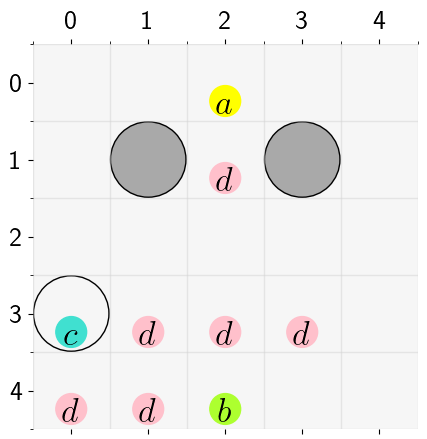

In [2]:
gw = grid_world('sequential_delivery', n_danger=6)
model = build_model(gw.ch_states[(0,0,0,0)].shape, gw.csrl.shape[-1])
# print(model.summary())
# model.load_weights(f'outputs/models/seq_del_p{gw.p}')
env = RL_LTL(gw, model)

In [3]:
env.train(50, T=[30], smart_start=True)
# env.get_policy(10, reset_tables=False)
# u, d, r, l

##########################
C: 0.5 | tow: 0.2
0 ) MCTS conf: -0.19 , det: 0.99 | s: 1 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('d',)]
1 ) MCTS conf: -0.35 , det: 1.0 | s: 3 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('b',)]
2 ) MCTS conf: -0.5 , det: 1.0 | s: 13 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('a',) ('a',)]
3 ) MCTS conf: -0.5 , det: 1.0 | s: 9 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('b',)]
4 ) MCTS conf: 0.9 , det: 1.0 | s: 14 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('b',) ('b',) ('b',) ('b',) ('b',)]
5 ) MCTS conf: -0.5 , det: 0.83 | s: 23 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('d',)]
6 ) MCTS conf: 1.0 , det: 1.0 | s: 10 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('a',) ('b',) ('c',)]
Running 500 simulations with 30 time-steps...
Test finished with:
	success rate: 269 / 500 = 0.538
7 ) MCTS conf: 0.88 , det: 0.68 | s: 19 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('a',) ('b',)]
Running 500 simulations

In [24]:
x = [(), ('a',), (), ('b',)]


array([('a',), ('b',)], dtype=object)

In [18]:
env.evaluate(runs=14000)

Running 14000 simulations with 50 time-steps...
Test finished with:
	success rate: 3929 / 14000 = 0.281


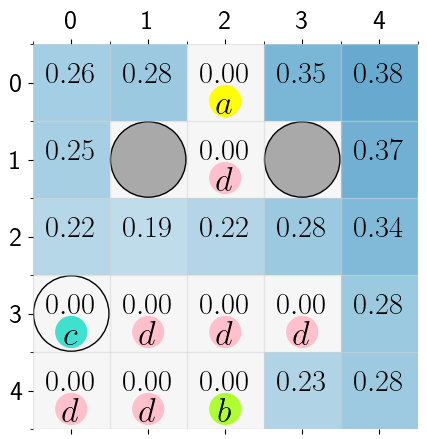

In [19]:
gw.mdp.plot(value=env.rew_table)

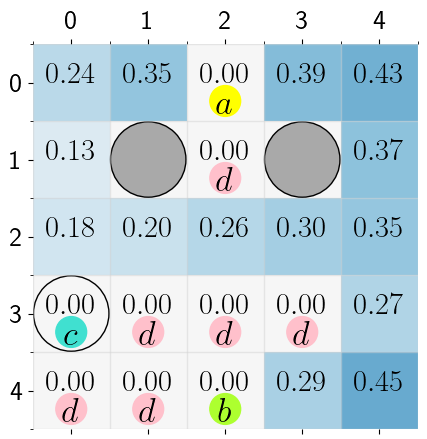

In [5]:
gw.mdp.plot(value=env.rew_table)
# gw.mdp.plot(policy=env.policy[0,0])

In [5]:
# model.save_weights(f'outputs/models/seq_del_p{p}')

In [7]:
env.evaluate(verbose=2, len=50, runs=1, start=None, animation='outputs/gifs/test')

Running 1 simulations with 50 time-steps...


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

episode 0 rew: True
episode: [(0, 0, 4, 4), (0, 0, 3, 4), (0, 0, 2, 4), (0, 0, 1, 4), (0, 0, 0, 4), (0, 0, 0, 3), (0, 0, 0, 2), (0, 3, 0, 3), (0, 3, 0, 4), (0, 3, 1, 4), (0, 3, 2, 4), (0, 3, 3, 4), (0, 3, 4, 4), (0, 3, 4, 3), (0, 3, 4, 2), (0, 1, 4, 3), (0, 1, 4, 4), (0, 1, 3, 4), (0, 1, 2, 4), (0, 1, 2, 3), (0, 1, 2, 2), (0, 1, 2, 1), (0, 2, 2, 1), (0, 5, 2, 0), (0, 5, 3, 0), (0, 5, 4, 0)]
Test finished with:
	success rate: 1 / 1 = 1.0


frame=   26 fps=0.0 q=-1.0 Lsize=      39kB time=00:00:07.66 bitrate=  41.7kbits/s speed=32.7x    
video:38kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 3.047884%
[libx264 @ 0x55d6a580f600] frame I:1     Avg QP:10.01  size: 14884
[libx264 @ 0x55d6a580f600] frame P:8     Avg QP:16.36  size:  1578
[libx264 @ 0x55d6a580f600] frame B:17    Avg QP:16.26  size:   623
[libx264 @ 0x55d6a580f600] consecutive B-frames:  3.8% 23.1% 11.5% 61.5%
[libx264 @ 0x55d6a580f600] mb I  I16..4: 48.9% 10.7% 40.3%
[libx264 @ 0x55d6a580f600] mb P  I16..4:  0.5%  1.2%  3.4%  P16..4:  2.1%  0.4%  0.2%  0.0%  0.0%    skip:92.3%
[libx264 @ 0x55d6a580f600] mb B  I16..4:  0.1%  0.1%  1.1%  B16..8:  6.2%  0.1%  0.1%  direct: 0.1%  skip:92.3%  L0:63.2% L1:36.8% BI: 0.0%
[libx264 @ 0x55d6a580f600] 8x8 transform intra:13.6% inter:18.0%
[libx264 @ 0x55d6a580f600] coded y,u,v intra: 30.2% 11.3% 13.4% inter: 0.4% 0.2% 0.2%
[libx264 @ 0x55d6a580f600] i16 v,h,dc,p: 72% 25%  3%  0%
[libx264 @

In [61]:
policy2=np.argmax(N1,axis=4)
value2=np.max(N1,axis=4)
np.save(f'outputs/Ours/SD_{p}', N1)

In [62]:
episodes, rew = run_Q_test(csrl, policy2, LTL_formula, predicates, start=None, T=35, runs=1000, verbose=0, reachability=True)

Running 1000 simulations with 35 time-steps...
Test finished with:
	success rate: 414 / 1000 = 0.414


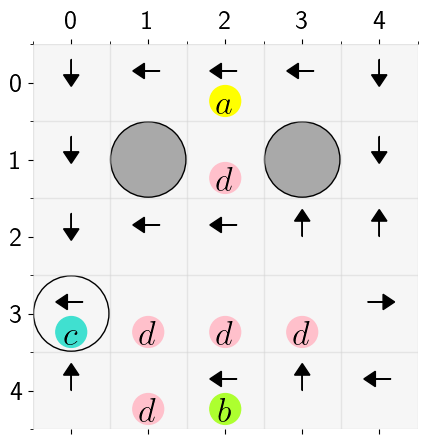

In [77]:
grid_mdp.plot(policy=policy2[0, 5])

In [11]:
env.gw.predicates

{'a': [2], 'b': [22], 'c': [20], 'd': [7, 16, 17, 18, 21]}

In [13]:
csrl.mdp.label[3,0]

('c',)

In [28]:
(W[state])/N[state]

/tmp/ipykernel_13239/3964365869.py:1: RuntimeWarning: invalid value encountered in divide
  (W[state])/N[state]


array([-0.5      , -0.5      , -0.5      , -0.4983165,        nan,
              nan,        nan,        nan,        nan,        nan])

In [26]:
state = (0, 0, 4, 3)
print([round(i,2) for i in Q[state][:6]])
print([round(i,2) for i in W[state][:6]])
print([round(i,2) for i in N1[state][:8]])
csrl.transition_probs[(state)][2]

[-0.5, -0.5, -0.5, -0.5, 0.0, 0.0]
[-1.5, -16.5, -8.5, -444.0, 0.0, 0.0]
[3.0, 33.0, 17.0, 891.0, 0.0, 0.0, 0.0, 0.0]


([(0, 0, 3, 3), (0, 0, 4, 4)], [0.0, 1])

In [ ]:
# u, d, r, l

0.8170728068875467

In [15]:
for x in [3]:
    gw = grid_world('sequential_delivery', plot=False, n_danger=x)
    Q = gw.csrl.q_learning(T=100,K=100000)
    policy1=np.argmax(Q,axis=4)
    episodes, rew, rew_table = run_Q_test(gw.csrl, policy1, gw.LTL_formula, gw.predicates, start=None, T=100, runs=1000, verbose=0, reachability=True)

Number of Omega-automaton states (including the trap state): 6
Running 1000 simulations with 100 time-steps...
Test finished with:
	success rate: 0 / 1000 = 0.0


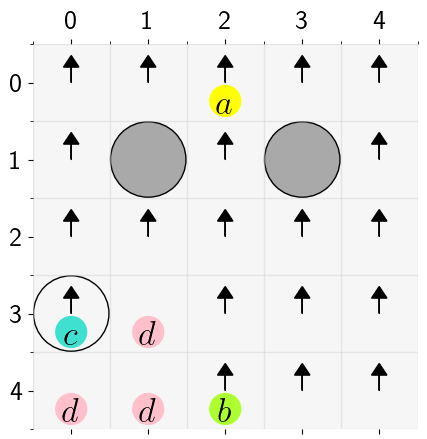

In [21]:
gw.mdp.plot(policy=policy1[0, 0])

In [6]:
Q = gw.csrl.q_learning(T=100,K=1000)
np.save(f'outputs/CSRL/SD_{p}', Q)

NameError: name 'p' is not defined

In [8]:
policy1=np.argmax(Q,axis=4)
value1=np.max(Q,axis=4)

In [9]:
episodes, rew = run_Q_test(csrl, policy1, LTL_formula, predicates, start=None, T=100, runs=1000, verbose=0, reachability=True)

Running 1000 simulations with 100 time-steps...
Test finished with:
	success rate: 0 / 1000 = 0.0


In [ ]:
visited_states_train = []
visited_states_test = []
LTL_coef = 10

search_depth = 30
MCTS_samples = 100

num_training_epochs =  30
num_test_epochs = 10
training = True
epochs = 10
T = [25]
K = 1
batch_size = 32
steps_per_epoch = 4

success_rates = []
succes_std = []
win_hist = []
train_history = []

os.remove("Log_run.txt")
for i in T:
    # TRAIN ##############################
    train_wins = 0
    # num_training_epochs = int(200 - 1.9*i)
    # model = build_model(ch_states[(0,0,0,0)].shape, csrl.shape[-1])
    N, W, Q, P, visited_train = np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), set()
    for epoch in range(num_training_epochs):
        t1 = time.time()
        print(Q[(0,0,0,0)][:4], len(visited_train))
        state_history, channeled_states, trajectory, action_history, reward_history, better_policy = MC_learning(csrl, model, LTL_formula,
                predicates, csrl.reward, ch_states, N = N, W = W, Q = Q, P = P, C=0.5, tow=1, n_samples=MCTS_samples, visited=visited_train,
                start=(0,0), search_depth=search_depth, verbose=0, T=i, K=K, run_num=epoch, ltl_f_rew=False)
        
        # print('N',N[(0,0,4,1)][:5])
        visited_states_train += state_history
        t2 = time.time()
        # print(t2-t1, " run episode")

        # win = check_LTL(LTL_formula, trajectory, predicates)[0]
        if reward_history[-1]>0: train_wins+=1

        if training and len(action_history)>0:
            if epoch==0:
                x_train = np.array(channeled_states)[:-1]
                y1_train = np.array(better_policy)
                y2_train = np.array(reward_history) + LTL_coef*reward_history[-1]
                # y2_train = np.array(reward_history)
                y2_train = y2_train[:-1]
            else:
                x_train = np.concatenate((x_train, np.array(channeled_states)[:-1]),0)
                y1_train = np.concatenate((y1_train, np.array(better_policy)),0)
                y2_train_curr = np.array(reward_history) + LTL_coef*reward_history[-1]
                # y2_train_curr = np.array(reward_history)
                y2_train = np.concatenate((y2_train, y2_train_curr[:-1]),0)
            t3= time.time()
            # print(t3-t2, " build database")
            tr_hist = model.fit(x_train, [y1_train, y2_train], epochs=epochs, batch_size=batch_size,
                                steps_per_epoch=steps_per_epoch if len(x_train)>steps_per_epoch*epochs*batch_size else None, verbose=0)
            train_history += tr_hist.history['loss']
        # win_hist.append(win)
        t4 = time.time()
        # print(t4-t3, "fit", len(x_train))
    print("Train wins:",train_wins,"/", num_training_epochs)

    # TEST ##############################
    test_wins = 0
    N, W, Q, P, visited_test = np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), set()
    for epoch in range(num_test_epochs):
        
        state_history, channeled_states, trajectory, action_history, reward_history, better_policy = MC_learning(csrl, model, LTL_formula,
                predicates, csrl.reward, ch_states, N = N, W = W, Q = Q, P = P, C=1, tow=1, n_samples=MCTS_samples, visited=visited_test,
                start=(0,0), search_depth=search_depth, verbose=0, T=i, K=1, NN_value_active=True)

        # win = check_LTL(LTL_formula, trajectory, predicates)[0]
        win = reward_history[-1]
        if win: test_wins+=1
        win_hist.append(win)
        visited_states_test += state_history
        
    success_rates.append(100*test_wins/num_test_epochs)
    temp = np.zeros(num_test_epochs)
    temp[:test_wins]=1
    std = np.sqrt(num_test_epochs*np.var(temp))
    succes_std.append((success_rates[-1]-std, success_rates[-1]+std))
    ###############################################################
    print("Test wins:",test_wins,"/",num_test_epochs)
    # print("last reward:", reward_history[-1], "  | trajectory:", trajectory)
    # print("Actions:", action_history)

encode_visited_states_test = [i[1]*csrl.shape[-2]*csrl.shape[-3]+i[2]*csrl.shape[-2]+i[3] for i in visited_states_test]
encode_visited_states_train = [i[1]*csrl.shape[-2]*csrl.shape[-3]+i[2]*csrl.shape[-2]+i[3] for i in visited_states_train]

[0. 0. 0. 0.] 0
0 ) MCTS conf: -27.0 , det: 1.0 | 

c:\Users\pc-admin\OneDrive - University of Waterloo\MSc\research\Code\RL-LTL\ComputeCanada_scrips\Utility_funcs.py:300: RuntimeWarning: overflow encountered in power
  Pi = (N[root]**(1/tow)) / np.sum(N[root]**(1/tow))
c:\Users\pc-admin\OneDrive - University of Waterloo\MSc\research\Code\RL-LTL\ComputeCanada_scrips\Utility_funcs.py:300: RuntimeWarning: invalid value encountered in divide
  Pi = (N[root]**(1/tow)) / np.sum(N[root]**(1/tow))


Warning
Pi: [ 0.  0.  0. nan  0.  0.  0.  0.  0.  0.]
N[root]: [7.000e+00 1.000e+00 4.000e+00 1.239e+03 0.000e+00 0.000e+00 6.000e+00
 0.000e+00 0.000e+00 0.000e+00]
root: (0, 1, 2, 1)
depth: -11
trajectory [0, 1, 2, 3, 4, 9, 14, 19, 24, 23, 22, 23, 24, 19, 14, 13, 12] + 11


ValueError: probabilities contain NaN

exploration in training: 0.35
exploration in testing: 0.18


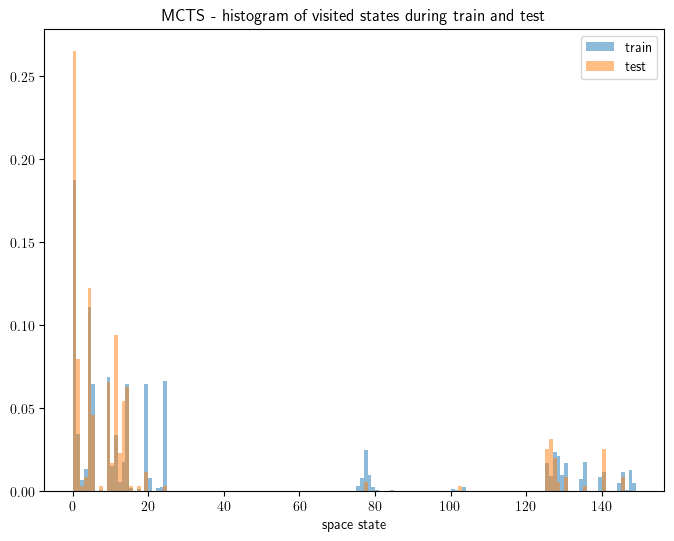

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(encode_visited_states_train, bins=range(total_number_of_states), density=True, alpha=0.5, label="train")
plt.title("MCTS - histogram of visited states during train and test")
plt.xlabel("space state")

plt.hist(encode_visited_states_test, bins=range(total_number_of_states), density=True, alpha=0.5, label="test")
plt.legend()

print("exploration in training:", round(np.unique(encode_visited_states_train).shape[0]/total_number_of_states, 2))
print("exploration in testing:", round(np.unique(encode_visited_states_test).shape[0]/total_number_of_states, 2))

ValueError: x and y must have same first dimension, but have shapes (1,) and (3,)

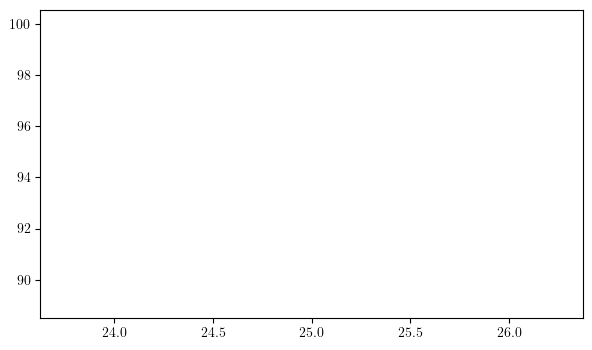

In [8]:
succes_std = np.array(succes_std)

plt.figure(figsize=(7,4))
plt.fill_between(T, succes_std[:,0], succes_std[:,1], alpha=0.3, label="MCTS area of 1 STD")

plt.plot(T, success_rates)
plt.xlabel("length of trajectory (T)")
plt.ylabel(f"succes rate (out of {num_test_epochs} runs)")
plt.title("MCTS performance results on the custom gridworld, P="+str(p))
success_rates

Text(0.5, 1.0, 'training loss')

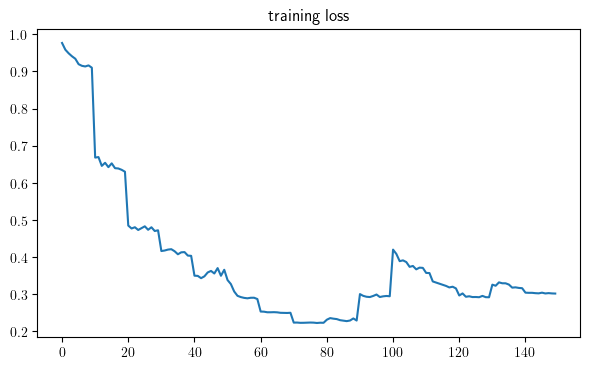

In [ ]:
interval = 400
plt.figure(figsize=(7,4))
plt.plot(train_history)
plt.title("training loss")
# plt.xticks(range(1,num_training_epochs*epochs,interval), range(0,num_training_epochs,interval//epochs));

In [5]:
Q, visited_states =csrl.q_learning(T=100,K=10000)
np.save(f'outputs/CSRL/SD_{p}', Q)

In [16]:
policy=np.argmax(Q,axis=4)
value=np.max(Q,axis=4)

In [17]:
rewards_mean = []
rewards_std = []
n_runs = 100

T = [26, 50, 75, 100, 150, 200, 300, 400]

for i in T:
    episodes, rew = run_Q_test(csrl, policy, LTL_formula, predicates, T=i, start=(0,0), runs=n_runs, verbose=0)
    rewards_mean.append(100*np.mean(rew))
    rewards_std.append((rewards_mean[-1]-np.sqrt(n_runs*np.var(rew)), rewards_mean[-1]+np.sqrt(n_runs*np.var(rew))))
rewards_std = np.array(rewards_std)

Running 100 simulations with 26 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0
Running 100 simulations with 50 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0
Running 100 simulations with 75 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0
Running 100 simulations with 100 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0
Running 100 simulations with 150 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0
Running 100 simulations with 200 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0
Running 100 simulations with 300 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0
Running 100 simulations with 400 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0


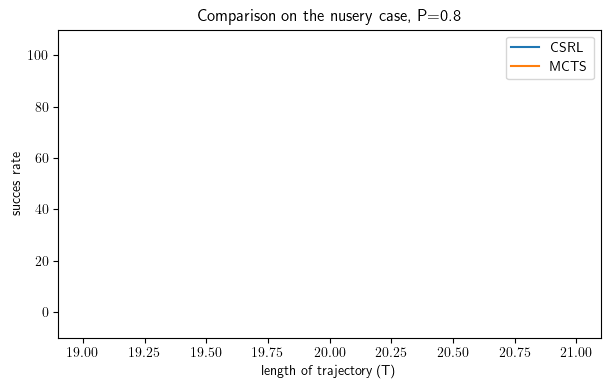

In [ ]:
plt.figure(figsize=(7,4))

plt.fill_between(T, rewards_std[:,0], rewards_std[:,1], alpha=0.3)
plt.plot(T, rewards_mean, label="CSRL")
plt.xlabel("length of trajectory (T)")
plt.ylabel("succes rate")
plt.title("Comparison on the sequentil delivery case, P="+str(p))
plt.ylim(-10, 110)

plt.fill_between(T, succes_std[:,0], succes_std[:,1], alpha=0.3)
plt.plot(T, success_rates, label="RL-LTL")
plt.legend()